In [1]:
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import dill as pickle
import seaborn as sns
import pandas as pd

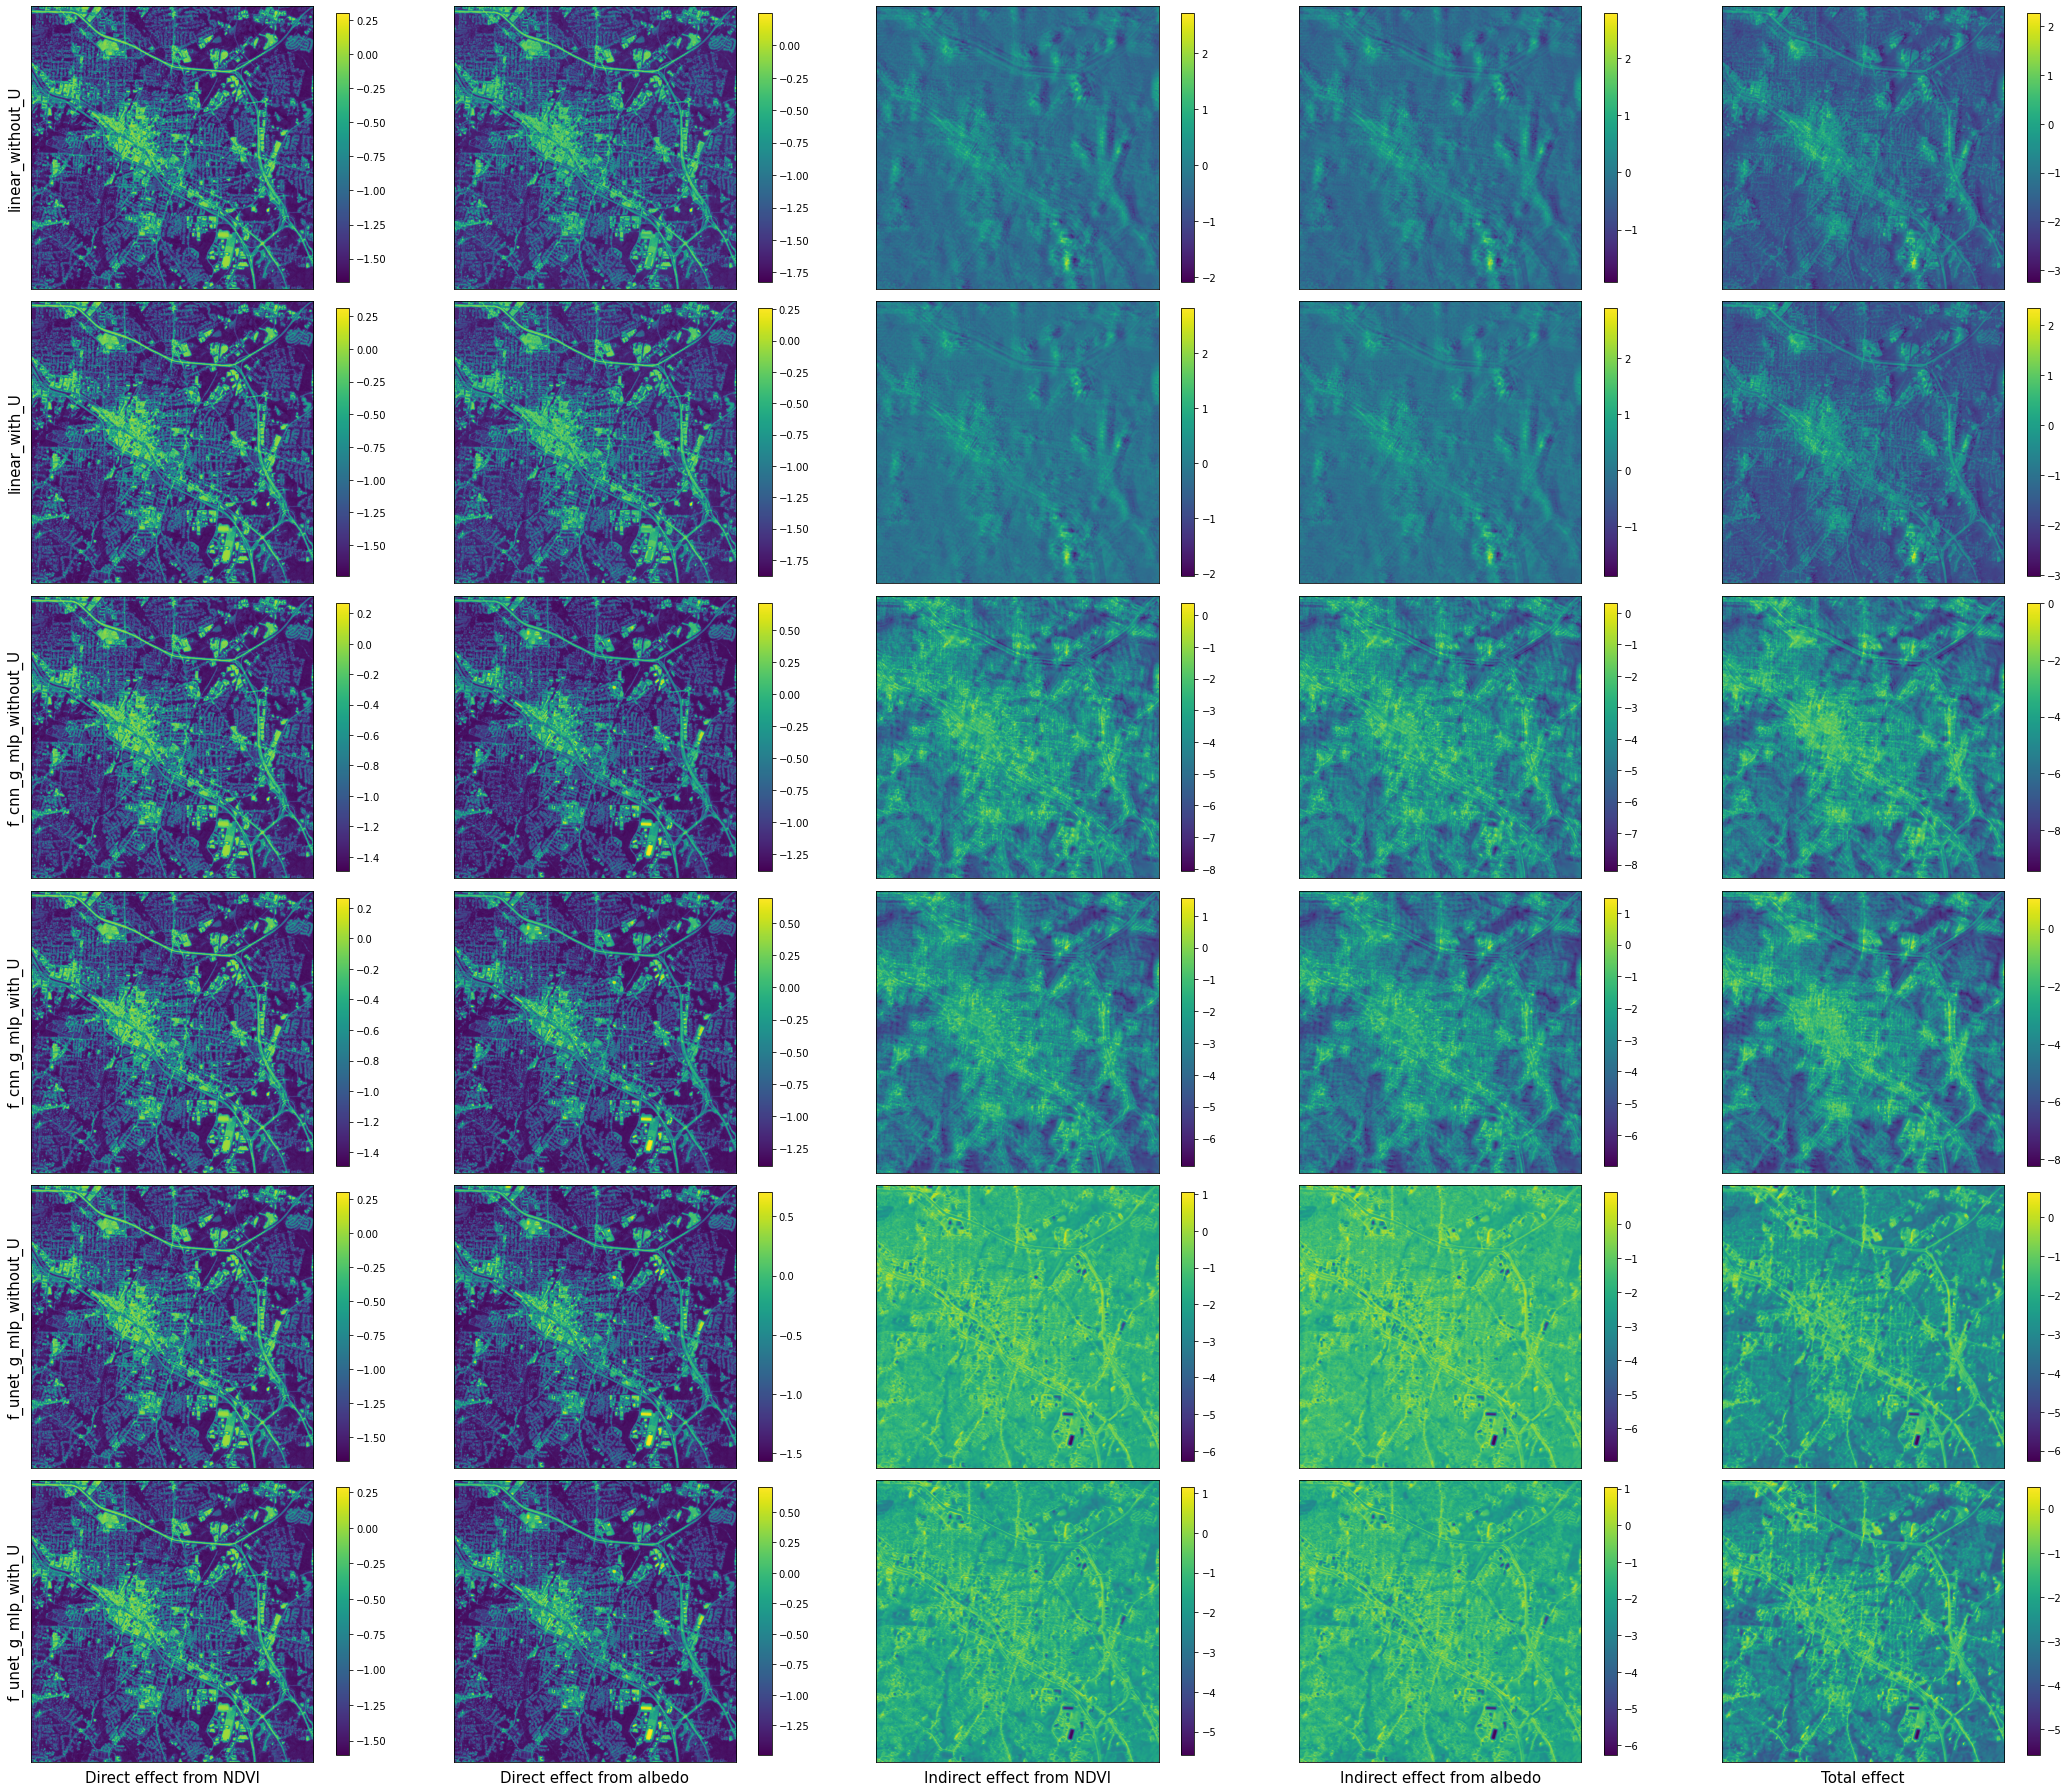

In [2]:
# Visualization of DE, IE, and TE
rows = [
    'linear_without_U',
    'linear_with_U', 
    'f_cnn_g_mlp_without_U', 
    'f_cnn_g_mlp_with_U',
    'f_unet_g_mlp_without_U',
    'f_unet_g_mlp_with_U',
]
cols = ['de_ndvi', 'de_albedo', 'ie_ndvi', 'ie_albedo', 'te']
col_names = ['Direct effect from NDVI', 'Direct effect from albedo', 'Indirect effect from NDVI', 
             'Indirect effect from albedo', 'Total effect']

fig, axs = plt.subplots(6,5,figsize=(30,25))
for i in range(len(rows)):
    with open(f'./results/results_{rows[i]}.pkl', 'rb') as f:
        res = pickle.load(f)
    for j in range(len(cols)):
        img = res[cols[j]]
        im = axs[i][j].imshow(img,cmap=plt.cm.viridis)
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])
        fig.colorbar(im,ax=axs[i][j],shrink=0.95)

for i in range(len(rows)):
    axs[i][0].set_ylabel(rows[i],fontsize=15)
for j in range(len(cols)):
    axs[-1][j].set_xlabel(col_names[j], fontsize=15)  
plt.tight_layout(h_pad=0.9,w_pad=0.5)
plt.savefig('./Causal_effect_visualizations.pdf', dpi=300)

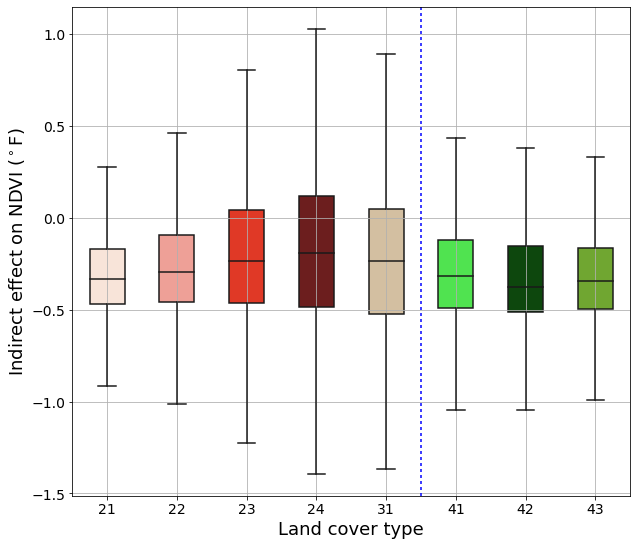

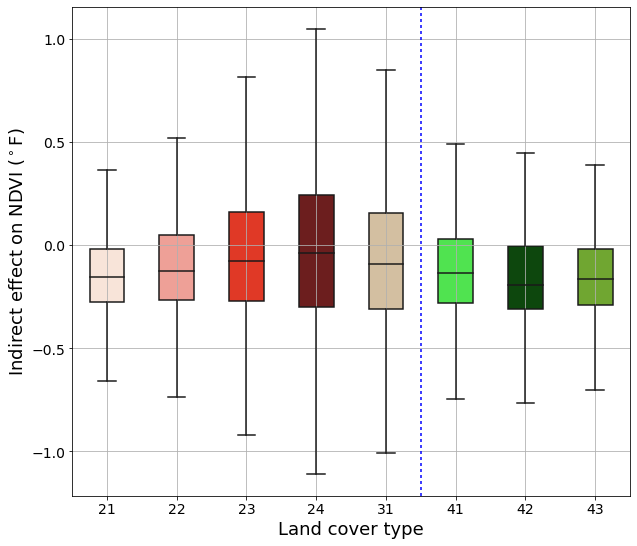

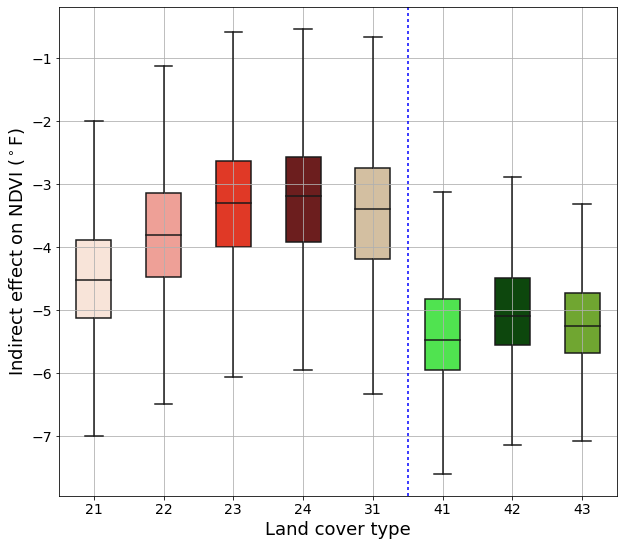

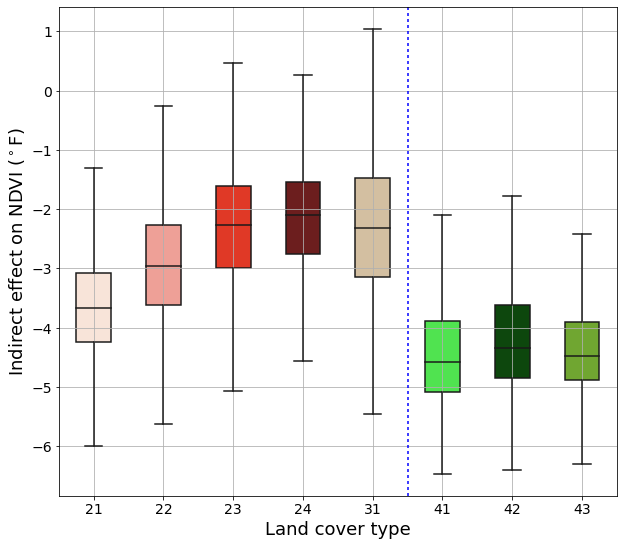

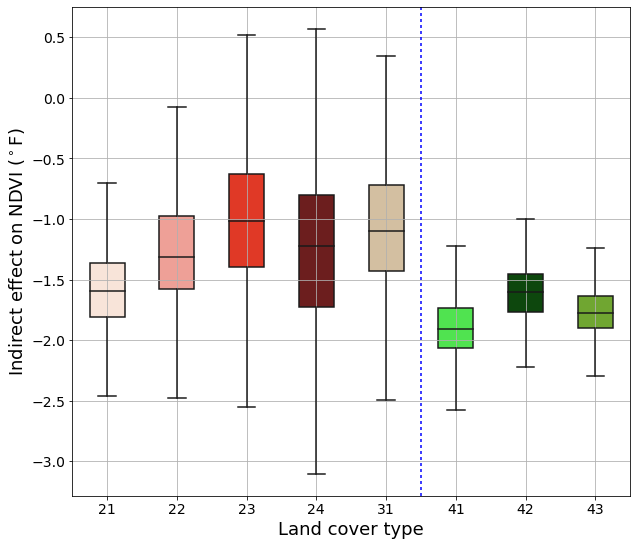

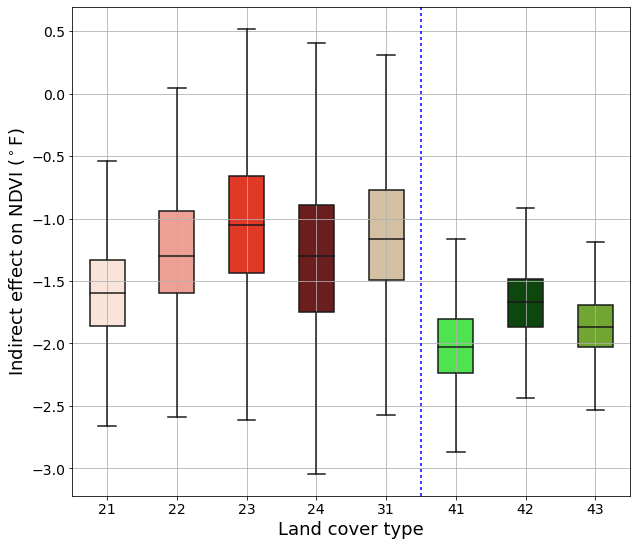

In [19]:
# Visualization of indirect effect from NDVI grouped by land cover type
fig_names = [
    'linear_without_U',
    'linear_with_U', 
    'f_cnn_g_mlp_without_U', 
    'f_cnn_g_mlp_with_U',
    'f_unet_g_mlp_without_U',
    'f_unet_g_mlp_with_U',
]

x_ticks = [21,22,23,24,31,41,42,43]
palette = {
    1: "#FDE3D4", 
    2: "#FC9589",
    3: "#FF2007",
    4: "#791111",
    5: "#DBC199",
    6: "#37FC37",
    7: "#045004",
    8: "#71BA1D",
}

for i in range(len(fig_names)):
    with open(f'./results/results_{fig_names[i]}.pkl', 'rb') as f:
        res = pickle.load(f)

    df = pd.DataFrame({
        "ie_ndvi": res["ie_ndvi"].reshape(-1), 
        "nlcd": res["nlcd"].reshape(-1)
    })
    df = df.loc[df["nlcd"].isin(palette.keys())]
    fig, ax = plt.subplots(1, 1, figsize=(10, 9))
    sns_plot = sns.boxplot(data=df, x="nlcd", y="ie_ndvi", width=0.5, ax=ax, palette=palette, showfliers=False)
    ax.axvline(4.5, color="blue", dashes=(2, 2))
    ax.set_xlabel("Land cover type", fontsize=18)
    ax.set_ylabel("Indirect effect on NDVI ($^\circ$F)", fontsize=18)
    xticklabels = ax.get_xticklabels()
    ax.set_xticklabels([x_ticks[i] for i in range(len(x_ticks))])
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.grid()
    if not os.path.exists("./Figures"):
        os.makedirs("./Figures")
    plt.savefig(f"./Figures/ie_ndvi_{fig_names[i]}.pdf")

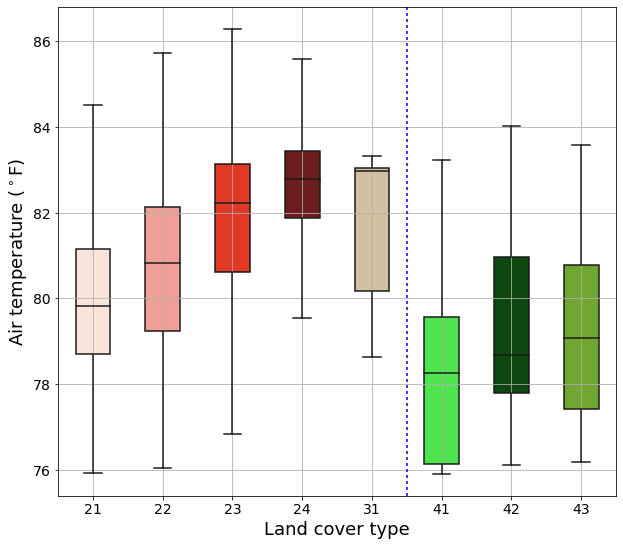

In [20]:
# Temperature distribution as a function of land cover type
palette = {
    21: "#FDE3D4", 
    22: "#FC9589",
    23: "#FF2007",
    24: "#791111",
    31: "#DBC199",
    41: "#37FC37",
    42: "#045004",
    43: "#71BA1D",
}

with rio.open('../../data/geospatial_data/durham/durham_nlcd.tif') as f:
    nlcd_arr = f.read(1)
with rio.open('../../data/geospatial_data/durham/durham_temp.tif') as f:
    temp_arr = f.read(1)
df = pd.DataFrame({
    "temp": temp_arr.reshape(-1),
    "nlcd": nlcd_arr.reshape(-1)
})
df = df.loc[df['temp'] != 0]
df = df.loc[df["nlcd"].isin(palette.keys())]
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
sns_plot = sns.boxplot(data=df, x="nlcd", y="temp", width=0.5, ax=ax, palette=palette, showfliers=False)
ax.axvline(4.5, color="blue", dashes=(2, 2))
ax.set_xlabel("Land cover type", fontsize=18)
ax.set_ylabel("Air temperature ($^\circ$F)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
if not os.path.exists("./Figures"):
    os.makedirs("./Figures")
plt.savefig(f"./Figures/temp_grouped_by_nlcd.pdf")